Intake is a new data dissemination package.
I packed up the planetfour data into an installable package that simply downloads the files when required.
To install it, install these 2 new conda packages (best in a Terminal):
```bash
conda install intake
conda install -c michaelaye planetfour-catalog
```
Then you can do:

In [3]:
import intake

list(intake.cat)

['planet4']

In [4]:
list(intake.cat.planet4)

['fans', 'blotches', 'tile_coordinates', 'metadata', 'region_names']

In [5]:
tiles = intake.cat.planet4.tile_coordinates.read()

For working while not online, I keep a copy in this folder:

In [6]:
tiles.to_csv(
    "tile_coordinates.csv", index=False
)  # don't need the row counter stored in the CSV

In [5]:
from shapely.geometry import MultiPoint


def get_outer_polygon_for_obsid(obsid):
    tiles = pd.read_csv("tile_coordinates.csv")
    obsid_tiles = tiles.query("obsid == @obsid")
    cols = "BodyFixedCoordinateX BodyFixedCoordinateY".split()
    coords = obsid_tiles[cols]
    coords.columns = ["x", "y"]
    mp = MultiPoint(list(zip(coords.x, coords.y)))
    return mp

In [6]:
obsid = "ESP_012079_0945"

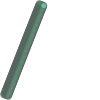

In [8]:
mp = get_outer_polygon_for_obsid(obsid)
mp

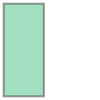

In [9]:
mp.envelope

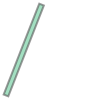

In [10]:
mp.convex_hull